# **Project Name**    -



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Apurba Koirala**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/apurbaaaa/YesBank

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [66]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score #for evaluation
from scipy.stats import skew, kurtosis, pearsonr, spearmanr, f_oneway, ttest_rel
from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from datetime import datetime

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv("data_YesBank_StockPrices.csv")

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

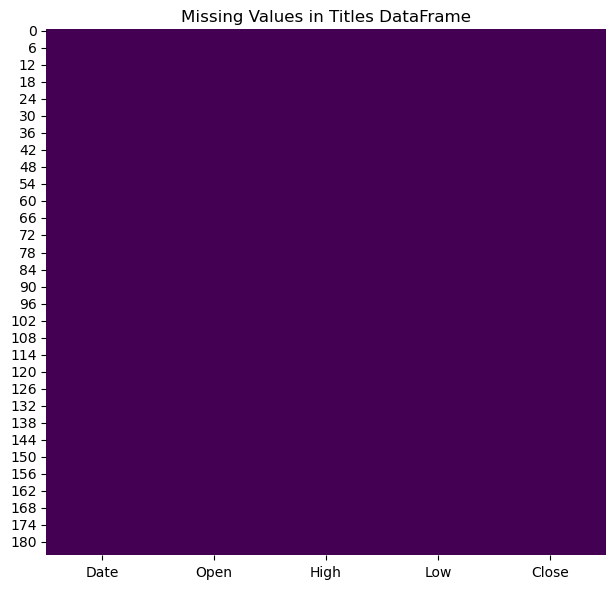

In [8]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Titles DataFrame")

plt.tight_layout()
plt.show()

### What did you know about your dataset?

From the "Know your data" section we understand that the data is a stock price based data of Yes Bank. There are no duplicated values and no null values so not much preprocessing is required in the dataframe. 

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
df[['Open', 'High', 'Low', 'Close']] = df[['Open', 'High', 'Low', 'Close']].astype(float)

In [11]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [13]:
# Write your code to make your dataset analysis ready.

#changing the data variable to proper datatype
df['Date'] = pd.to_datetime(df['Date'], format='%b-%y')
df['Date'] = df['Date'].apply(lambda x: x if x.year >= 2000 else x.replace(year=x.year + 100))
df.set_index('Date', inplace=True)
df = df.sort_index()  # Ensure chronological order
df.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [14]:
df.tail()

,Open,High,Low,Close
Date,,,,
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15
2020-10-01,13.30,14.01,12.11,12.42
2020-11-01,12.41,14.90,12.21,14.67


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

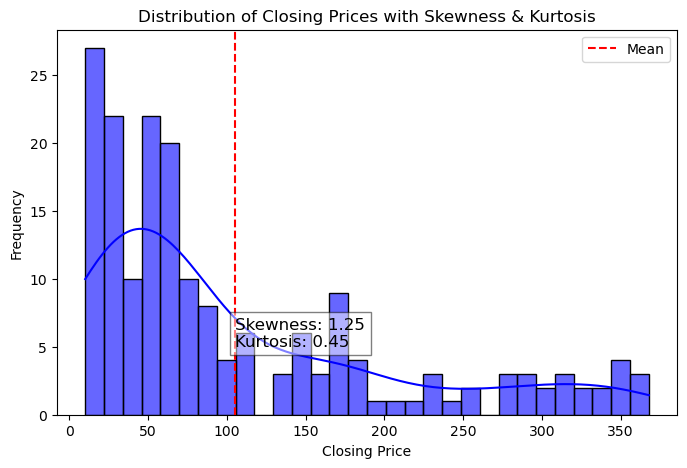

In [15]:
# Chart - 1 visualization code
# Calculate skewness and kurtosis
skewness = skew(df['Close'])
kurt = kurtosis(df['Close'])

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Close'], bins=30, kde=True, color='blue', alpha=0.6)

# Annotate skewness and kurtosis
plt.axvline(df['Close'].mean(), color='red', linestyle='dashed', label='Mean')
plt.text(df['Close'].mean(), 5, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices with Skewness & Kurtosis')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

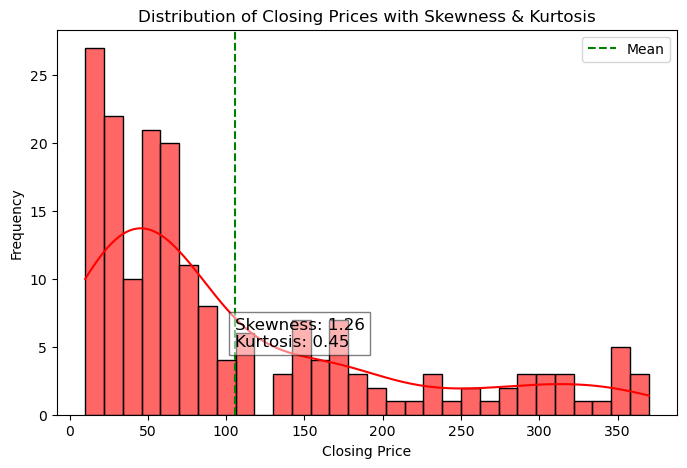

In [16]:
# Chart - 2 visualization 
skewness = skew(df['Open'])
kurt = kurtosis(df['Open'])

# Plot histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Open'], bins=30, kde=True, color='red', alpha=0.6)

# Annotate skewness and kurtosis
plt.axvline(df['Open'].mean(), color='green', linestyle='dashed', label='Mean')
plt.text(df['Open'].mean(), 5, f"Skewness: {skewness:.2f}\nKurtosis: {kurt:.2f}", 
         fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices with Skewness & Kurtosis')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

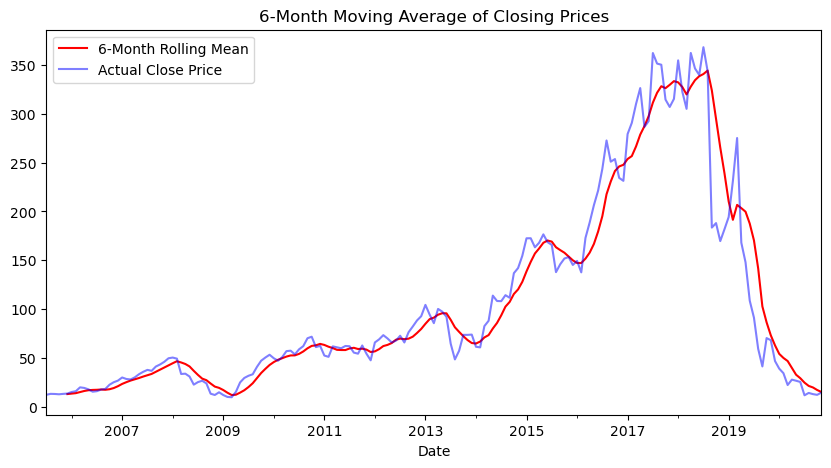

In [17]:
# Chart - 3 visualization code
df['Close'].rolling(window=6).mean().plot(figsize=(10, 5), color='red', label='6-Month Rolling Mean')
df['Close'].plot(color='blue', alpha=0.5, label='Actual Close Price')
plt.legend()
plt.title('6-Month Moving Average of Closing Prices')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

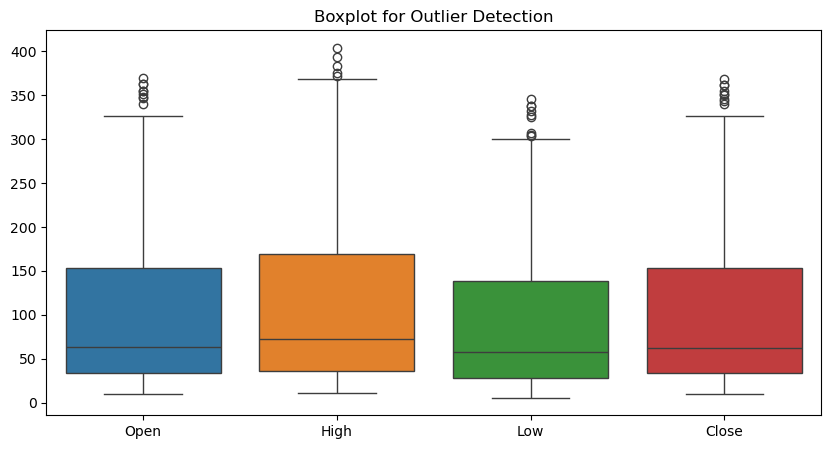

In [70]:
# Chart - 4 visualization code
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot for Outlier Detection")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

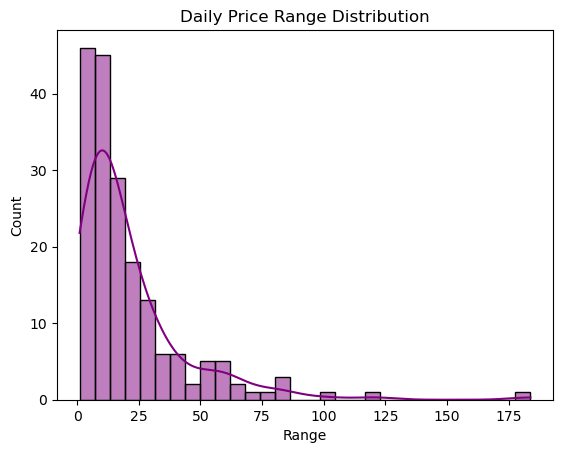

In [19]:
# Chart - 5 visualization code
df['Range'] = df['High'] - df['Low']
sns.histplot(df['Range'], bins=30, kde=True, color='purple')
plt.title('Daily Price Range Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

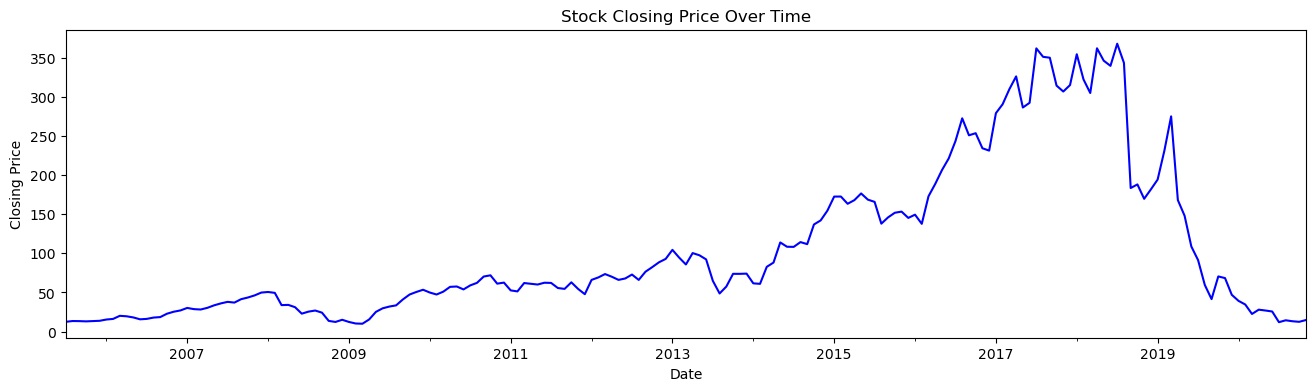

In [20]:
# Chart - 6 visualization code
df['Close'].plot(kind='line', figsize = (16, 4), color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Stock Closing Price Over Time')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

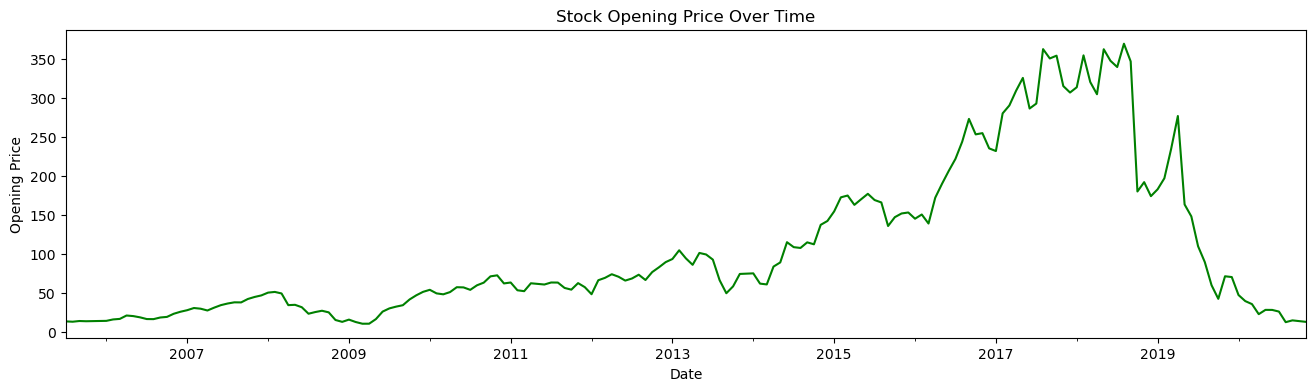

In [21]:
# Chart - 7 visualization code
df['Open'].plot(kind='line', figsize = (16, 4), color='green')
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Stock Opening Price Over Time')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

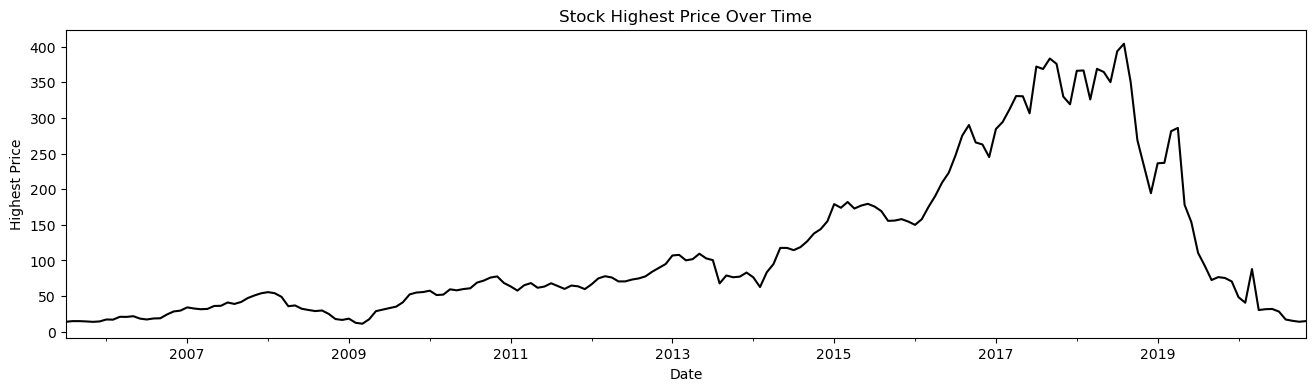

In [22]:
# Chart - 8 visualization code
df['High'].plot(kind='line', figsize = (16, 4), color='black')
plt.xlabel('Date')
plt.ylabel('Highest Price')
plt.title('Stock Highest Price Over Time')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

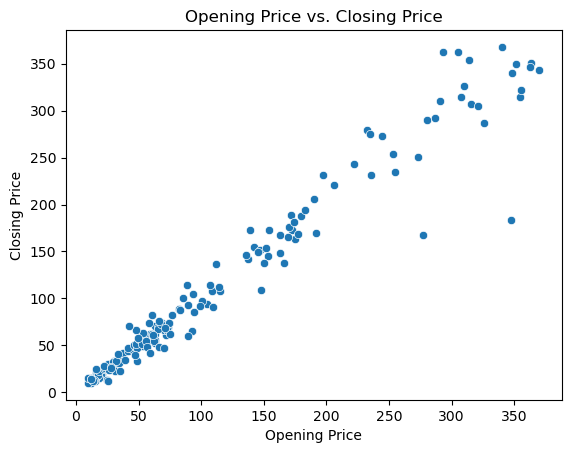

In [23]:
# Chart - 9 visualization code
sns.scatterplot(x=df['Open'], y=df['Close'])
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Opening Price vs. Closing Price')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

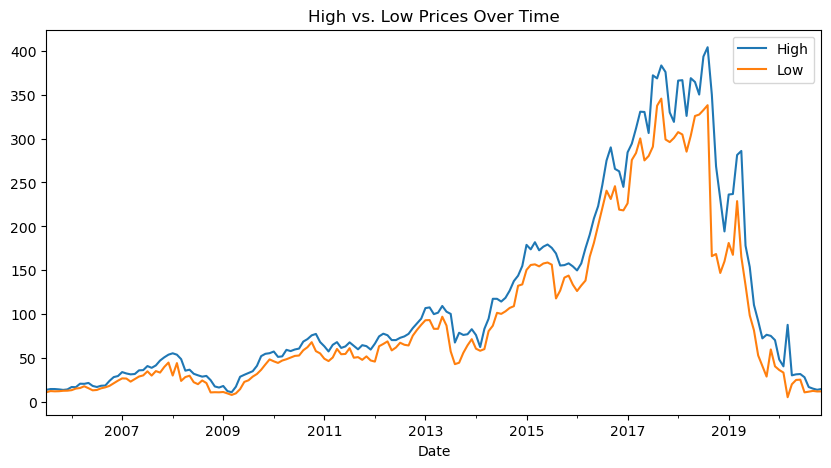

In [24]:
# Chart - 10 visualization code
df[['High', 'Low']].plot(figsize=(10, 5))
plt.title('High vs. Low Prices Over Time')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

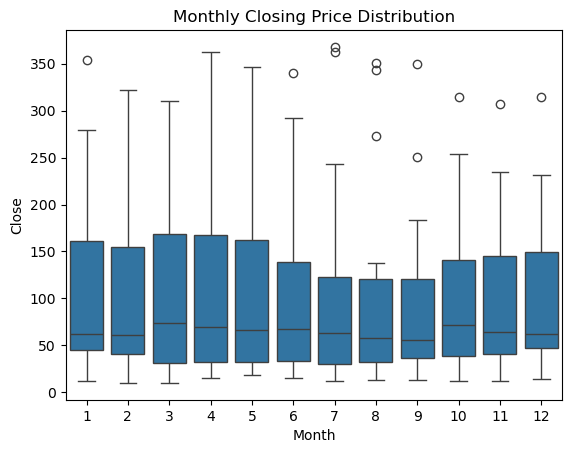

In [25]:
# Chart - 11 visualization code
df['Month'] = df.index.month
sns.boxplot(x=df['Month'], y=df['Close'])
plt.title('Monthly Closing Price Distribution')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

<Axes: xlabel='Date'>

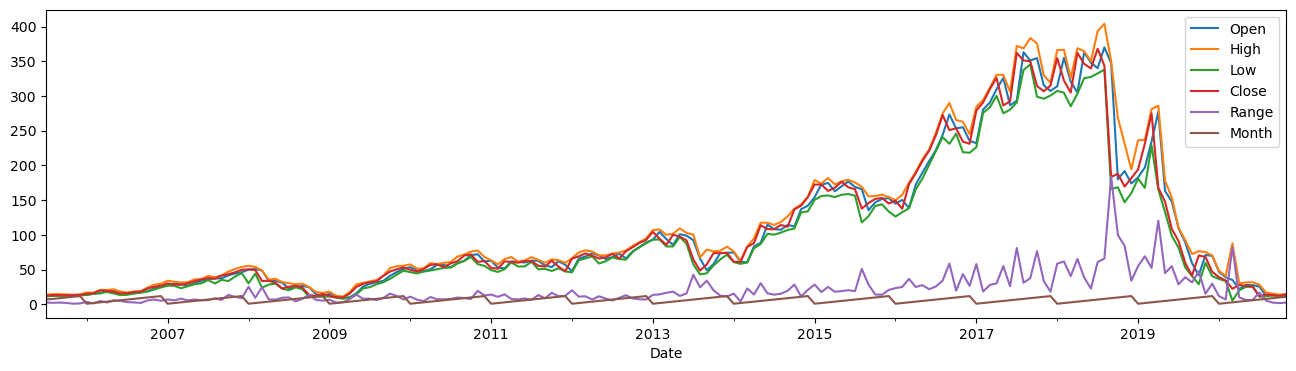

In [26]:
# Chart - 12 visualization code
df.plot(figsize = (16, 4))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

<Axes: xlabel='Date'>

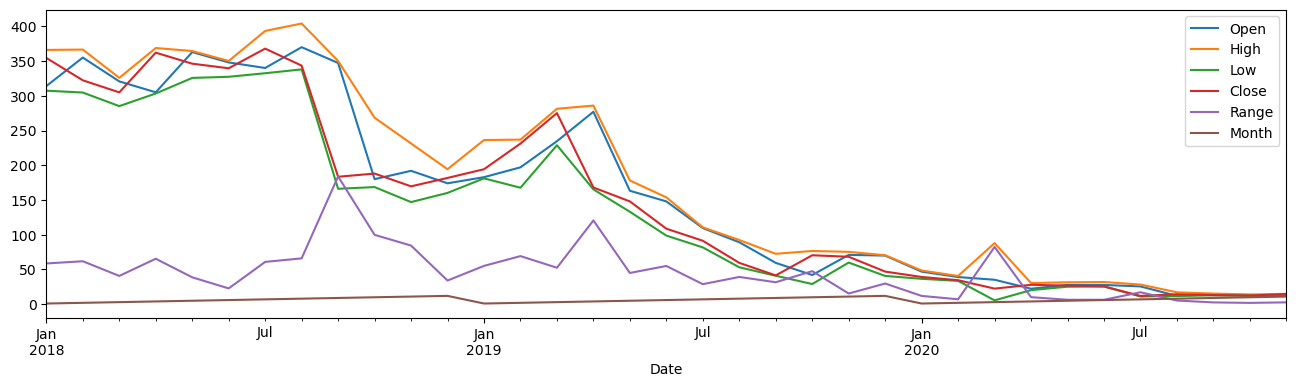

In [27]:
# Chart - 13 visualization code
df.plot(xlim = ['2018-01-01', '2020-11-01'],figsize = (16, 4))

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

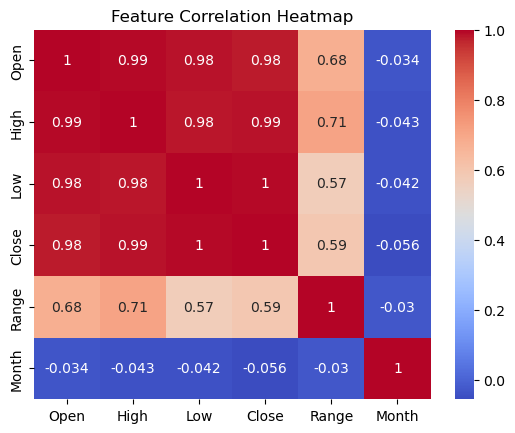

In [28]:
# Correlation Heatmap visualization code
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

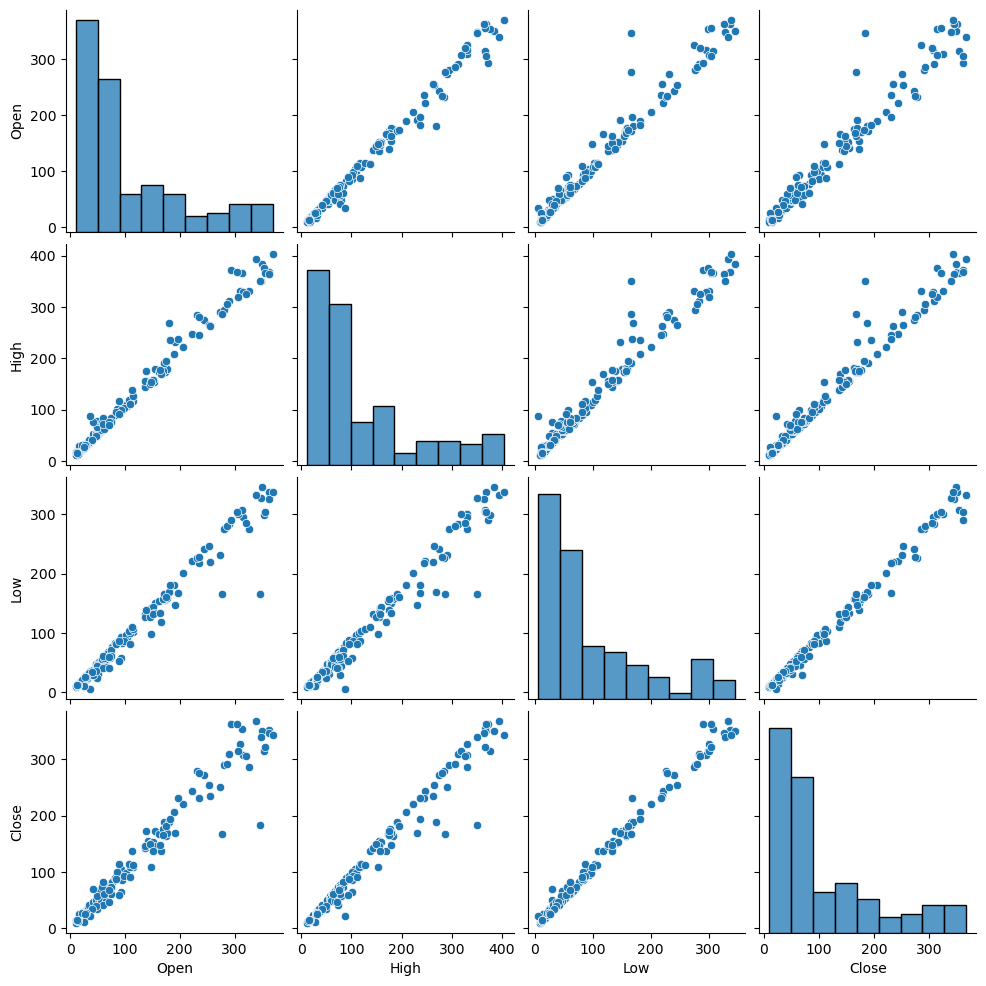

In [29]:
# Pair Plot visualization code
sns.pairplot(df[['Open', 'High', 'Low', 'Close']])
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Focused on Open and Close only because:

Open price represents the first price of the stock for the given period (e.g., daily, monthly).

Close price represents the last traded price, which is widely used in financial modeling and forecasting.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant correlation between the opening price and closing price of the stock.

Alternative Hypothesis (H₁): There is a significant correlation between the opening price and closing price of the stock.

#### 2. Perform an appropriate statistical test.

In [63]:
# Perform Statistical Test to obtain P-Value
corr, p_value = pearsonr(df['Open'], df['Close'])
print(f"Pearson Correlation: {corr}, P-value: {p_value}")

Pearson Correlation: 0.9779710062230935, P-value: 1.852774505865485e-126


##### Which statistical test have you done to obtain P-Value?

**Pearson Correlation Test**

##### Why did you choose the specific statistical test?

It measures the linear relationship between two continuous numerical variables (Open and Close).

It provides both a correlation coefficient (r) (indicating strength and direction) and a p-value (indicating statistical significance).

The variables are assumed to be normally distributed, making Pearson's test suitable for this analysis.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The stock closing prices have a unit root (i.e., they are non-stationary).

Alternative Hypothesis (H₁): The stock closing prices are stationary.


#### 2. Perform an appropriate statistical test.

In [69]:
# Perform Statistical Test to obtain P-Value
result = adfuller(df['Close'])
print(f"ADF Statistic: {result[0]}, P-value: {result[1]}")


ADF Statistic: -1.9064091411726567, P-value: 0.3290520815004394


##### Which statistical test have you done to obtain P-Value?

Augmented Dickey-Fuller (ADF) Test

##### Why did you choose the specific statistical test?

It determines whether the time-series data (Closing Price) is stationary or non-stationary.

Stationarity is crucial for time-series forecasting models (e.g., ARIMA, LSTMs).

Data is non-stationary if (p-value ≥ 0.05).

Since p-value = 0.329 > 0.05, we fail to reject H₀, meaning the data is non-stationary.



### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The opening price does not Granger-cause the closing price.

Alternative Hypothesis (H₁): The opening price Granger-causes the closing price.

#### 2. Perform an appropriate statistical test.

In [67]:
# Perform Statistical Test to obtain P-Value
df_lagged = df[['Open', 'Close']].dropna()
grangercausalitytests(df_lagged, maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=91150.4597, p=0.0000  , df_denom=181, df_num=1
ssr based chi2 test:   chi2=92661.2408, p=0.0000  , df=1
likelihood ratio test: chi2=1145.1707, p=0.0000  , df=1
parameter F test:         F=91150.4597, p=0.0000  , df_denom=181, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=46119.5127, p=0.0000  , df_denom=178, df_num=2
ssr based chi2 test:   chi2=94830.0093, p=0.0000  , df=2
likelihood ratio test: chi2=1144.1678, p=0.0000  , df=2
parameter F test:         F=46119.5127, p=0.0000  , df_denom=178, df_num=2


{1: ({'ssr_ftest': (91150.45970848436, 1.4344714521568517e-246, 181.0, 1),
   'ssr_chi2test': (92661.24080862498, 0.0, 1),
   'lrtest': (1145.1706533996717, 5.028966427196047e-251, 1),
   'params_ftest': (91150.45970848436, 1.4344714521568517e-246, 181.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (46119.512707283735, 2.1649778357231777e-242, 178.0, 2),
   'ssr_chi2test': (94830.00927452724, 0.0, 2),
   'lrtest': (1144.1677795018854, 3.524710850154114e-249, 2),
   'params_ftest': (46119.51270728379, 2.1649778357229176e-242, 178.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

##### Which statistical test have you done to obtain P-Value?

Granger Causality Test

##### Why did you choose the specific statistical test?

It determines whether past values of one variable (Open Price) can be used to predict another variable (Close Price).

It is useful for time-series forecasting since financial data is highly dependent on previous values.

The test helps in feature engineering by confirming whether adding lagged Open prices as a feature can improve prediction models for Close prices.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values so no need to do so

#### What all missing value imputation techniques have you used and why did you use those techniques?

No missing value imputation techniques have been employed

### 2. Handling Outliers

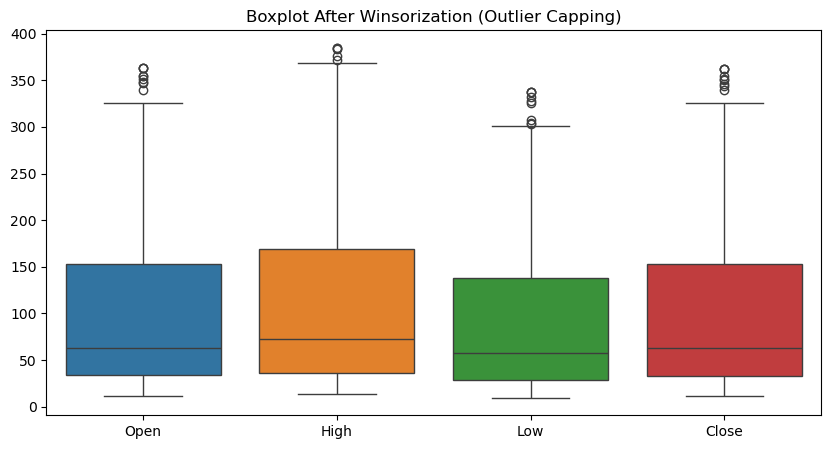

In [74]:
# Handling Outliers & Outlier treatments
#Winsorization, preserves stock trends while capping extreme outliers
import numpy as np

# Define capping thresholds (1st & 99th percentile)
low_percentile = df[['Open', 'High', 'Low', 'Close']].quantile(0.01)
high_percentile = df[['Open', 'High', 'Low', 'Close']].quantile(0.99)

# Apply Winsorization (Capping Outliers)
df_winsorized = df.copy()
for col in ['Open', 'High', 'Low', 'Close']:
    df_winsorized[col] = np.where(df[col] > high_percentile[col], high_percentile[col], 
                                  np.where(df[col] < low_percentile[col], low_percentile[col], df[col]))

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_winsorized[['Open', 'High', 'Low', 'Close']])
plt.title("Boxplot After Winsorization (Outlier Capping)")
plt.show()

df_winsorized['Volatility'] = (df_winsorized['High'] - df_winsorized['Low']) / df_winsorized['Open']
df_winsorized['Close_MA_6'] = df_winsorized['Close'].rolling(window=6).mean()

df_winsorized['Prev_Close_1'] = df_winsorized['Close'].shift(1)
df_winsorized['Prev_Close_2'] = df_winsorized['Close'].shift(2)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

#### What all categorical encoding techniques have you used & why did you use those techniques?

No categorical columns so no need to encode

### 4. Feature Manipulation and Selection

#### 1. Feature Manipulation

In [75]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [76]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [48]:
# Transform Your data

### 6. Data Scaling

In [49]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [50]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [51]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

No, the dataset is not imbalanced as the data contains progressive date values for prices and not classified categories.

#### Handling Imbalanced Dataset (If needed)

No Need

## ***7. ML Model Implementation***

### ML Model - 1

In [53]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [54]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [55]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [56]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [57]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [58]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [59]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [60]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [61]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [62]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***